This small project was born as a simple self-assignment, with which I tried to use Python (mostly scipy.stats) to recreate a "Trading Card Game odds calculator", by which I mean an instrument with which to calculate the probability of drawing any amount of copies of a certain card, or a combination of cards, from a deck.

There are already NUMEROUS of these calculators online, most of which don't show their source code behind the GUI. I just tried to build the logic from the ground to review some of my knowledge in statistics and explore a bit of Python libraries I hadn't already used.

In particular, there are two main sections in this notebook:
- A **"Copies Drawn" calculator**, which shows the odds of drawing any number of copies of a card from a deck
- A **"Combination Drawn" calculator**, which tells the odds of drawing multiple cards in the same hand

The code is free to use and it is almost completely a direct use of already available functions, simply adapted for this particular problem.

The results should all be correct and have been compared with other calculators'.

The function used in this program could be used to build software that calculates the odds of drawing a certain card during a game (such as Untapped Companion: https://mtga.untapped.gg/companion), but as this could be considered cheating I explicitly maintained my code focused on the deckbuilding side of odds calculation.

As I am myself a Magic the Gathering player (https://magic.wizards.com/en), most of the examples below will use MTG vocabulary, but the code can be used for any kind of situation with a "deck" and "draws".

**EDIT 04/05/2023:** After almost completing the code, while I was looking for some different calculators with which to compare my results, I found another one explicitly talking about hypergeometric distribution and multivariate (hypergeometric) distribution as mine: https://www.mtgnexus.com/tools/drawodds/. This also gave the same results as my code, which I believe is enough proof that the calculations are accurate. 

In the case of the combination calculator, I yet didn't find a calculator which can work with any number of cards like mine.

**EDIT 05/05/2023:** In the end of the notebook I also **added** an **extra section** about a better implementation of the iterative code used in section 2 based on an answer I received to a question on stackoverflow, which showed me some tech I didn't know and I tried to implement myself with the functions I originally used.

# 1 -  Copies Drawn

In this section, I will present a code to calculate the probability of seeing a particular element (card) in function of the population size (deck size), the number of specimens in the population (copies of the same card) and the number of draws (cards seen).

As I'm not considering the possibility of redrawing a card after it is drawn (no replacements), I opted for using a hypergeometric distribution.

This is luckily already implemented in the scipy.stats library: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html

## Source code

In [1]:
#logic
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

#graphics
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
np.set_printoptions(formatter={'float_kind':'{:.2f}'.format})
from matplotlib.ticker import MaxNLocator

#name uniquely the export image files
import uuid 

In [2]:
#main function
def copiesDrawn(deckSize=60, copies=4, cardsDrawn=7, array=True, plot=True, labels=True, save=False, nameFiles='result'):
    
    #call a function which check for errors in the arguments
    errorCheck_1(deckSize, copies, cardsDrawn, array, plot, labels, save, nameFiles)
    
    #statistics
    rv = hypergeom(deckSize, copies, cardsDrawn)
    x = np.arange(0, copies+1)
    pmf = rv.pmf(x)
    
    #function with which we can print the result, show plots and save them
    outputFunction(x, pmf, copies, cardsDrawn, array, plot, labels, save, nameFiles);

    #if needed for further analysis, the function returns the probability array
    return pmf

In [3]:
# Output section 
def outputFunction(x, pmf, copies, cardsDrawn, array, plot, labels, save, nameFiles):
    nice_pmf=100*pmf
    
    #giving the opportunity to block the array print or plot showing in case one of the is not needed
    if array:
        print("Probabilities (%) of drawing from 0 to " + str(copies) + " copies, having drawn " + str(cardsDrawn)\
              + " cards:\n", nice_pmf)
    
    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.vlines(x, 0, nice_pmf, lw=2,linestyles='dashed',alpha=0.5)
        ax.plot(x, nice_pmf, 'bo', ms=10)
        plt.xlabel('# Copies Drawn', fontsize=20)
        plt.ylabel('Probability', fontsize=20)
        plt.grid()
        ax.set_facecolor('#F2FBFB')
        
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.tick_params(axis='both', labelsize=16)
        
        #as labels might currently overlap, I added the opportunity to remove them completely
        if labels:
            for i,j in zip(x,nice_pmf):
                if j>1.00: #this condition is an aesthetic choice
                    ax.annotate('%.2f'%(j)+'%',xy=(i+0.25, j), size=14, color="k",weight='bold')
        
        if save:
            filename = namefiles + '_'+str(uuid.uuid4())+'.png'
            plt.savefig(filename,bbox_inches='tight')
        
        plt.show()
    
    return pmf

In [4]:
#secondary function, which checks for errors
def errorCheck_1(deckSize, copies, cardsDrawn, array, plot, labels, save, nameFiles):
    
    # input arguments' type checks
    if isinstance(deckSize, int)==False:
        raise ValueError("results: the deckSize must be an integer greater than 0. Default is 60.")

    if isinstance(copies, int)==False:
        raise ValueError("results: the number of copies must be an integer greater than 0. Default is 4.")

    if isinstance(cardsDrawn, int)==False:
        raise ValueError("results:  the number of cards drawn must be an integer greater than 0. Default is 7.")

    if isinstance(array, bool)==False:
        raise ValueError("results: the array argument must be a boolean: True or False. Default is True.")

    if isinstance(plot, bool)==False:
        raise ValueError("results: the plot argument must be a boolean: True or False. Default is True.")

    if isinstance(labels, bool)==False:
        raise ValueError("results: the labels argument must be a boolean: True or False. Default is True.")
        
    if isinstance(save, bool)==False:
        raise ValueError("results: the save argument must be a boolean: True or False. Default is True.")
    
    if isinstance(nameFiles, str)==False:
        raise ValueError("results: the nameFiles argument must be a String (between marks). Default is 'result'.")
    
    #logic checks on arguments' values
    if deckSize < 1:
        raise ValueError("results: the deckSize must be an integer greater than 0. Default is 60.")

    if copies < 1:
        raise ValueError("results: the number of copies must be an integer greater than 0. Default is 4.")
        
    if cardsDrawn < 0:
        raise ValueError("results: the number of cards drawn must be an integer greater than 0. Default is 7.")
        
    if copies > deckSize:
        raise ValueError("results: You cannot have more copies of a card in the deck than the total number of cards. \
                            Default is 4")

    if cardsDrawn > deckSize:
        raise ValueError("results: You cannot draw more cards from the deck than the total number of cards. \
                            Default is 7.")
        
    #to keep the code simpler, the plot can be saved just when the plot is shown in the notebook
    if plot==False and save==True:
        raise ValueError("result: You cannot value the argument save as True if plot is valued False")

## How to Use
The easiest way to use the code is to simply launch it one time.

**Example 1:** I'm playing a commander deck with no partners (99 cards from which to draw) and I'm wondering my possibility to draw a green land, of which I might have 8 instances in the deck, in my first 3 turns (10 cards seen with no extra draws, tutoring or milling. As I might draw a few more cards, I might look for the probability adding more than 10 draws, let's say 15). 

Probabilities (%) of drawing from 0 to 8 copies, having drawn 15 cards:
 [25.46 39.68 24.93 8.20 1.54 0.17 0.01 0.00 0.00]


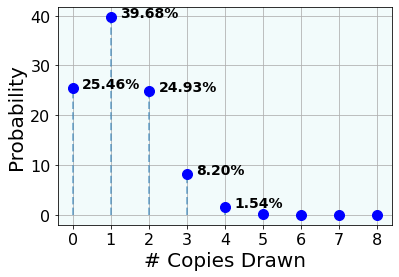

In [5]:
copiesDrawn(deckSize = 99, copies = 8, cardsDrawn = 15);

Some more parameters add more customizability to the function call:
- **array** defines whether to print or not the array of probabilities of drawing x copies of the card (starting from 0). I reduced the decimal point for readability. Default is True.
- **plot** defines whether to plot or not the same array (useful for visualization). Default is True.
- **labels** defines whether to add or not labels on the plot (might be needed to be removed for readability). Default is True.
- **save** asks the code to save or not the plot as a png in the work directory. Default is False.
- **nameFiles** define a prefix for the output files. Defaults are "result".

#### Sidenote on the plotting:
As shown for example in this StackOverflow thread https://stackoverflow.com/questions/19073683/how-to-fix-overlapping-annotations-text I might consider adding to the plotting code a section with which calculate an optimal position for every annotation. I didn't for the sake of simplicity.

### Looping the function:
One might use the function in a for loop, collecting the different results or plotting all of them for comparison, as shown below

**Example 2:** Here I'm collecting the results of the loop in a list, for statistics

In [6]:
list = []

for i in range(1,8):
    list.append(copiesDrawn(deckSize = 99, copies = i, cardsDrawn = 15, array=False,\
                             plot=False, labels=True, save=False, nameFiles='result'))

print(list)

[array([0.85, 0.15]), array([0.72, 0.26, 0.02]), array([0.61, 0.33, 0.06, 0.00]), array([0.51, 0.38, 0.10, 0.01, 0.00]), array([0.43, 0.40, 0.14, 0.02, 0.00, 0.00]), array([0.36, 0.41, 0.18, 0.04, 0.00, 0.00, 0.00]), array([0.30, 0.41, 0.22, 0.06, 0.01, 0.00, 0.00, 0.00])]


Note that you can still save the plots from the loop, as their names are unique by code

**Example 3:** plot comparison

Here I'm changing the number of copies of a card in the deck, to find the best one for the first 3 turns of the game.

One might use a more sofisticated analysis than looking at the higher chance, but this is beyond this notebook's aim

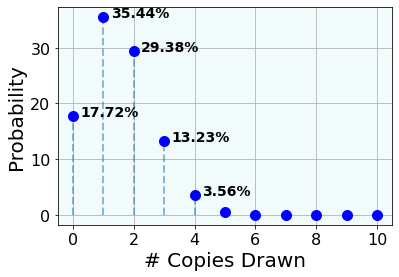

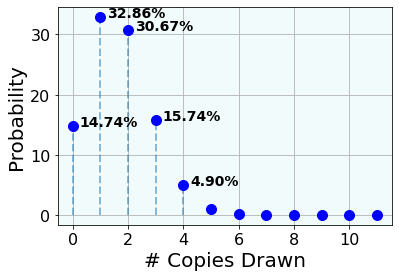

In [7]:
for i in range(10,12): #remember range(a,b) goes from a to b-1
    list.append(copiesDrawn(deckSize = 99, copies = i, cardsDrawn = 15, array=False, plot=True,\
                             labels=True, save=False, nameFiles='result'))

# 2 - Combination of card drawn

In this section, I will present a code to calculate the probability of seeing a particular collection of elements (a certain amount of each of these different cards) in function of the population size (deck size), the number of specimens in their populations (copies available of each card) and the number of draws (cards seen).

As for the first script, I'm not considering the possibility of redrawing a card after it is drawn (no replacements), hence I opted for using a multivariate hypergeometric distribution for the cards pdf.

This statistic too is already implemented in the scipy.stats library: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_hypergeom.html

In this case I didn't find any useful application of plots, so the only output of the function will be a percentage (float). This could be changed easily if someone needed.

### Cumulative Probability
Another difference from the previous case is that there are no ready-made functions in the scipy.stats library, or any kind of simple loop calls of the function, that might help calculate the cumulative probability of drawing AT LEAST the number of copies of each specimen required by the user. 

This means that with only the multivariate_hypergeom.pmf, we could calculate the probability of drawing an exact combination of cards, without considering the probabilities in which we draw additional copies of the same.

To overcome this problem I wrote the getPossibleArrays, which use the product method from the itertools library to calculate all the possible combination of legal draws with at least the number of copies required by the user.

Also, to create something a bit different from the similar calculators I've seen online, I wanted to make my script usable for an arbitrarily large combination of cards. This is still limited by the computational efficiency of the code but is more versatile than a two cards combo calculator.

In [8]:
#logic
from scipy.stats import multivariate_hypergeom
import numpy as np

#iteratively find all the possible legal combination in the case cumulative probability was needed
import itertools as itera

In [9]:
#main function
def comboDraw(deckSize = 60, copies = [4, 4], draws = [1,1], totDraws = 7, cumulative = True, showResult = True):

    #call a function which check for errors in the arguments
    #if the computation is too costly (large arrays and/or draws), might want to comment this out
    errorCheck_2(deckSize, copies, draws, totDraws, cumulative, showResult)
    
    #initializing variables needed in the computation
    xTot = np.sum(draws)
    mTot = np.sum(copies)

    #these added element to draws and copies are needed by the pfm method
    #could be calculated later, but placed here for code readability
    draws.append(totDraws - xTot)
    copies.append(deckSize - mTot)

    #handSlot and cases are used in the computation of the many possible permutations, when calculating cumulative prob.
    handSlots = totDraws - xTot 
    cases = []
    
    #final output
    result = 0
    
    #check whether we want an exact or cumulative permutation 
    
    #exact solution:
    #the case with handSlot == 0 has the same solution in both the exact and cumulative cases
    if cumulative == False or handSlots == 0:
        result= multivariate_hypergeom.pmf(draws, copies, totDraws)

        #if using a large loop user might want to hide the result
        if showResult:
             print('The probability of drawing this exact number of cards of each type is: \
                    \n%.2f'%(result*100)+'%')           
    
    #cumulative solution:
    else:
        #here I'm calling a function with which I'll find any legal draws combination to consider
        copySlots = np.array(copies[:-1]) - np.array(draws[:-1])

        cases = getPossibleArrays(copySlots, handSlots)

        #now I will sum the probability of drawing each of these combinations
        for case in cases:

            #as the number of cards drawn for each type change, I update the last digits of my array to input in pfm 
            new_draws = np.array(draws.copy())
            new_draws[:-1] += case[:]

            xTot = np.sum(new_draws[:-1])

            new_draws[-1] = (totDraws - xTot)

            #actual result calculated with the pfm method
            result+=(multivariate_hypergeom.pmf(new_draws, copies, totDraws))
    
        if showResult:
            print('The probability of drawing at least these numbers of cards of each type is: \
                    \n%.2f'%(result*100)+'%')

    #return the result as it might be useful for statystics or looping
    return(result)

In [10]:
def getPossibleArrays(copySlots, handSlots):
    #initialize an empty list to store the result (possible combination of draws while considering cumulative probability)
    #a draw is accepted if doesn't surpass the available number of copies of a card of any type
    #and if it doesn't require you to draw more cards than the number required by the user
    cases = []
    
    #create a list of ranges for each cell based on the corresponding value in the input array
    ranges = [range(x+1) for x in copySlots]
    
    #generate all possible arrays by iterating over all possible values for each cell
    for values in itera.product(*ranges):
        
        #check if the sum of the array is less than or equal to the number of available slots in the drawn hand
        if sum(values) <= handSlots:
            
            #add the array to the result list if it meets the conditions
            cases.append(values)
    
    #return the list of possible arrays
    return cases

#get_possible_arrays([4,4],5)

In [11]:
#secondary function, which checks for errors
def errorCheck_2(deckSize, copies, draws, totDraws, cumulative, showResult):
    
    # input arguments' type checks
    if isinstance(deckSize, int)==False:
        raise ValueError("results: the deckSize must be an integer greater than 0. Default is 60.")

    for i in copies:
        if isinstance(i, int)==False:
            raise ValueError("results: the number of copies must be an integer greater than 0. Default is 4.")

    for i in draws:
        if isinstance(i, int)==False:
            raise ValueError("results: the number of card drawn must be an integer greater than 0. Default is 4.")    

    if isinstance(totDraws, int)==False:
        raise ValueError("results:  the number of cards drawn must be an integer greater than 0. Default is 4.")

    if isinstance(cumulative, bool)==False:
        raise ValueError("results: the cumulative argument must be a boolean: True or False. Default is True.")
        
    if isinstance(showResult, bool)==False:
        raise ValueError("results: the showResult argument must be a boolean: True or False. Default is True.")
        
    #logic checks on arguments' values
    if deckSize < 1:
        raise ValueError("results: the deckSize must be an integer greater than 0. Default is 60.")

    for i in copies:
        if i < 1:
            raise ValueError("results: the number of copies must be an integer greater than 0. Default is 4.")
    
    for i in draws:
        if i < 0:
            raise ValueError("results: the number of draws of a card must be an integer greater than 1. Default is 4.")

    if totDraws < 0:
        raise ValueError("results: the number of cards drawn must be an integer greater than 0. Default is 7.")
        
    if sum(draws) > deckSize:
        raise ValueError("results: You cannot draw more copies of a card than the total number of cards. \
                            Default is 4.")

    for i in range(len(draws)):
        if draws[i] > copies[i]:
            raise ValueError("results: You cannot draw more copies of a card than the number of this card in the deck. \
                                Default is 4.")
            
    if len(draws) != len(copies):
        raise ValueError("results: The draws array cannot have a different size (number of elements) than the copies array.")

    if totDraws > deckSize:
        raise ValueError("results: You cannot draw more cards from the deck than the total number of cards. \
                            Default is 7.")

## How to Use

The script launch is pretty straightforward. 

All the parameters have default values, so they can be ignored in the function calls.

I will briefly explain them one by one:
- **deckSize** is the size of the card pool from which you're drawing consequently without repetitions. The default value is 60 cards
- **copies** is an array (can be of any size) in which write the number of available copies of every card we are considering. The default value is [4,4]
- **draws** is an array (can be of any size) in which write the number of copies of every card we want to draw in our pool. The default value is [1,1].
- **totDraws** is the number of cards drawn from the deck
- **cumulative** is a boolean which tells the code whether to calculate the probability of drawing EXACTLY the number of copies we asked (False) or any combination of cards with AT LEAST these numbers of copies (True).
- **showResult** is a boolean which tells the code whether to print or not the resulting percentage. In any case, the result is returned as the output of the function

**Example:** I'm playing an 80 cards deck (F for the Yorion players) and I want to know how many chances I have to draw in the first 3 turns (10 cards if I start on the draw):
- at least 2 of my 15 blue mana sources
- at least 1 of my 8 counterspells
- at least 3 of my 12 cantrips

In [12]:
comboDraw(deckSize = 80, copies = [15, 8, 12], draws = [2, 1, 3], totDraws = 10, cumulative = True);

The probability of drawing at least these numbers of cards of each type is:                     
4.03%


**NOTE:** If the populations (different cards) you are considering overlap, the code will give you a wrong result. Try to consider SEPARATED populations.

If one of my populations is blue cards and the other is red cards, you have to "decide" in which category put cards that are both red and blue.

This can be solved with reason and semantics and I didn't think it needed a hard-coded solution.

### Looping the function
Again, one might get crazy and loop the code for any kind of statistics or plotting

**Example 2**: Here I'm wondering how many green the chance of drawing an increasing number of blue cards (max 5) if I have 3 green cards in my initial hand of 8 (and 20 green cards in total in the deck) in my commander deck (deckSize = 99).

This doesn't take into consideration the nature of every non-blue non-green card. It's just one of the other 99-20-5 cards in the deck!

In [13]:
for i in range(6):
    res = comboDraw(deckSize = 99, copies = [5, 20], draws = [i, 3], totDraws = 8, cumulative = False, showResult=False);
    
    print("The chance of drawing exactly " + str(i) + " blue cards in this hand is:\n"+'%.8f'%(res*100)+'%\n')

The chance of drawing exactly 0 blue cards in this hand is:
10.72657618%

The chance of drawing exactly 1 blue cards in this hand is:
3.83092006%

The chance of drawing exactly 2 blue cards in this hand is:
0.43165296%

The chance of drawing exactly 3 blue cards in this hand is:
0.01798554%

The chance of drawing exactly 4 blue cards in this hand is:
0.00024638%

The chance of drawing exactly 5 blue cards in this hand is:
0.00000067%



# 3 -  Sidenote on the iteration function in section 2
While I was writing this code I found myself stuck in a section (the way to iteratively create permutations of arrays for the combo calculator) and tried to ask help on stack overflow:
https://stackoverflow.com/questions/76175062/python-combinatory-problem-with-arrays-and-integers/76175234#76175234

If in the end I found myself an answer that worked good enough for me, another user named **btilly** showed me an incredibly better solution using **generator functions** self-calling themselves and using the **yield** keyword.

I had never seen these concepts before and it was shocking how fast they worked.

I couldn't put this piece of code as I couldn't understand it at the time of writing, but wanted to show it for anyone who might read this notebook

In [14]:
def find_filtered_combs (value_limit, max_sum, i=0, partial=None):
    if partial is None:
        partial = []

    if max_sum < 0:
        pass # No combs to find
    elif max_sum == 0:
        zeros = len(value_limit) - len(partial)
        yield partial + ([0]*zeros)
    elif len(value_limit) <= i:
        yield partial
    else:
        for j in range(value_limit[i]+1):
            partial.append(j)
            yield from find_filtered_combs(value_limit, max_sum - j, i+1, partial)
            partial.pop()

In [15]:
#for comb in find_filtered_combs([2]*30, 2):
#    print(comb)

Below a solution I found trying to use the same concepts suggested by btilly, but the iteratools library I originally found.

This is a less elegant solution, but should be similarly efficient. I just tried to apply what I've seen in their code "with my own words".

I believe the key here is that the self-calling function let the code write one solution at the time, not occuping the memory with all the combinations at the same time.

In [16]:
import itertools

def generate_possible_arrays(input_array, target_sum):
    # Create a list of ranges for each cell based on the corresponding value in the input array
    ranges = [range(x+1) for x in input_array]
    
    # Generate all possible arrays by iterating over all possible values for each cell
    for values in itertools.product(*ranges):
        # Check if the sum of the array is less than or equal to the target sum
        if sum(values) <= target_sum:
            # Yield the array if it meets the conditions
            yield values

In [17]:
input_array = [2]*10
target_sum = 2

#for possible_array in generate_possible_arrays(input_array, target_sum):
#    print(possible_array)